1.) The weather has the highest max temperature for cities as they are located closer to latitude 0, the Equator. This makes sense as that is where sunlight hits the most directly, rather than at an angle such as with northern or southern cities. Also, during this time of year, it is much colder in the high latitudes of northern hemisphere cities, which makes sense due to the seasonal tilt of the Earth, and this corresponds to northern hemisphere winter.

2.) There is a cluster of cities with very low humidities (~20%) at around latitudes 20 and -20. These latitudes near the Tropic of Cancer and Capricorn have very low moisture due to wind and ocean currents and feature the Sahara Desert as well as the Australian Outback.

3.) There doesn't seem to be any overall pattern to city latitudes and their wind speeds. There is a cluster of high wind speed  cities at a latitude of around 70 in the northern hemisphere. This corresponds to the most northern cities of Canada, Russia, Norway, and Alaska, which are mostly coastal to the Arctic and Atlantic Oceans, and thus exposed to very high wind speeds. There is a similar group of southern hemisphere cities at around -40 latitude that correspond to

In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

#create empty list for all of city api calls
main = []

print("Beginning Data Retrieval     ")
print("-------------------------------")
rec = 1
setc = 1

# for all the city names in cities list, loop through and process record
for index, city in enumerate(cities):
        
    #Create records and sets
    if (index % 50 == 0 and index >= 50):
        setc = setc + 1
        rec = 0    
    #pring log of each city
    print(f"Processing Record {rec} of Set {setc} : {city}") 

    rec = rec + 1

    #Make API request for cities
    try:
        #retrieve data
        city_weather = requests.get("http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2e7be3fbf6a6ca5ee22f83c7998246c&q=" + city).json()

        #add this city to the main city list
        main.append({"City": city, 
                          "Lat": city_weather["coord"]["lat"], 
                          "Lng": city_weather["coord"]["lon"], 
                          "Max Temp": city_weather["main"]["temp_max"],
                          "Humidity": city_weather["main"]["humidity"],
                          "Cloudiness": city_weather["clouds"]["all"],
                          "Wind Speed": city_weather["wind"]["speed"],
                          "Country": city_weather["sys"]["country"],
                          "Date": city_weather["dt"]})

    #catch errors for city not found
    except:
        print("City not found. Skipping...")
        pass
              
#print for finishing the data loop
print("-------------------------------")
print("Data Retrieval Complete      ")
print("-------------------------------")

Beginning Data Retrieval     
-------------------------------
Processing Record 1 of Set 1 : kargopol
Processing Record 2 of Set 1 : new norfolk
Processing Record 3 of Set 1 : airai
Processing Record 4 of Set 1 : velyka bilozerka
Processing Record 5 of Set 1 : ushuaia
Processing Record 6 of Set 1 : aykhal
Processing Record 7 of Set 1 : rikitea
Processing Record 8 of Set 1 : saskylakh
Processing Record 9 of Set 1 : vaini
Processing Record 10 of Set 1 : carnarvon
Processing Record 11 of Set 1 : hun
Processing Record 12 of Set 1 : saint george
Processing Record 13 of Set 1 : benbrook
Processing Record 14 of Set 1 : itatiaia
Processing Record 15 of Set 1 : atuona
Processing Record 16 of Set 1 : hermanus
Processing Record 17 of Set 1 : aranda de duero
Processing Record 18 of Set 1 : cape town
Processing Record 19 of Set 1 : mahebourg
Processing Record 20 of Set 1 : chokurdakh
Processing Record 21 of Set 1 : port alfred
Processing Record 22 of Set 1 : vangaindrano
Processing Record 23 of Set

City not found. Skipping...
Processing Record 39 of Set 4 : saint-philippe
Processing Record 40 of Set 4 : nanortalik
Processing Record 41 of Set 4 : la orilla
Processing Record 42 of Set 4 : bambous virieux
Processing Record 43 of Set 4 : fairbanks
Processing Record 44 of Set 4 : hay river
Processing Record 45 of Set 4 : mnogovershinnyy
Processing Record 46 of Set 4 : grand river south east
City not found. Skipping...
Processing Record 47 of Set 4 : sao jose da coroa grande
Processing Record 48 of Set 4 : talnakh
Processing Record 49 of Set 4 : vao
Processing Record 0 of Set 5 : ancud
Processing Record 1 of Set 5 : kandiari
Processing Record 2 of Set 5 : betlitsa
Processing Record 3 of Set 5 : ciudad del maiz
Processing Record 4 of Set 5 : espanola
Processing Record 5 of Set 5 : martapura
Processing Record 6 of Set 5 : ponta do sol
Processing Record 7 of Set 5 : tuatapere
Processing Record 8 of Set 5 : viterbo
Processing Record 9 of Set 5 : tura
Processing Record 10 of Set 5 : parince

Processing Record 24 of Set 8 : bara
Processing Record 25 of Set 8 : klaksvik
Processing Record 26 of Set 8 : krasnousolskiy
City not found. Skipping...
Processing Record 27 of Set 8 : tutoia
Processing Record 28 of Set 8 : dangara
Processing Record 29 of Set 8 : san quintin
Processing Record 30 of Set 8 : san francisco
Processing Record 31 of Set 8 : attawapiskat
City not found. Skipping...
Processing Record 32 of Set 8 : plerin
Processing Record 33 of Set 8 : iwanai
Processing Record 34 of Set 8 : kapoeta
Processing Record 35 of Set 8 : novopokrovka
Processing Record 36 of Set 8 : reno
Processing Record 37 of Set 8 : nouadhibou
Processing Record 38 of Set 8 : santa adelia
Processing Record 39 of Set 8 : roma
Processing Record 40 of Set 8 : giyani
Processing Record 41 of Set 8 : george town
Processing Record 42 of Set 8 : dongning
Processing Record 43 of Set 8 : bac lieu
Processing Record 44 of Set 8 : tilichiki
Processing Record 45 of Set 8 : paamiut
Processing Record 46 of Set 8 : p

Processing Record 12 of Set 12 : constanta
Processing Record 13 of Set 12 : dzhusaly
City not found. Skipping...
Processing Record 14 of Set 12 : bekobod
Processing Record 15 of Set 12 : kupang
Processing Record 16 of Set 12 : borogontsy
Processing Record 17 of Set 12 : tocopilla
Processing Record 18 of Set 12 : aleksinac
Processing Record 19 of Set 12 : tromso
Processing Record 20 of Set 12 : aripuana
Processing Record 21 of Set 12 : hinton
Processing Record 22 of Set 12 : praia
Processing Record 23 of Set 12 : zhigansk
Processing Record 24 of Set 12 : purpe
Processing Record 25 of Set 12 : ngukurr
City not found. Skipping...
Processing Record 26 of Set 12 : japura
Processing Record 27 of Set 12 : spearfish
Processing Record 28 of Set 12 : ayagoz
Processing Record 29 of Set 12 : arlit
Processing Record 30 of Set 12 : formoso do araguaia
City not found. Skipping...
Processing Record 31 of Set 12 : baruun-urt
Processing Record 32 of Set 12 : aksarka
Processing Record 33 of Set 12 : kand

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#create panda frame and display
main_data = pd.DataFrame(main)
main_data.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
main_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kargopol,61.51,38.95,30.34,95,43,8.97,RU,1605020769
1,new norfolk,-42.78,147.06,64.99,61,57,2.68,AU,1605020770
2,airai,-8.93,125.41,63.48,100,100,1.43,TL,1605020770
3,velyka bilozerka,47.28,34.71,45.86,54,0,7.78,UA,1605020770
4,ushuaia,-54.80,-68.30,50.00,53,40,9.17,AR,1605020734


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
main_data.describe() 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02
mean,20.777440,15.267662,57.463754,71.918089,49.208191,7.958379,1.605021e+09
std,33.383438,89.537319,26.548804,20.225907,39.446309,5.636303,7.246081e+01
min,-54.800000,-175.200000,-24.230000,8.000000,0.000000,0.430000,1.605021e+09
25%,-6.395000,-63.720000,37.980000,63.000000,2.250000,3.965000,1.605021e+09
50%,24.585000,19.095000,66.200000,75.000000,46.500000,6.710000,1.605021e+09
75%,48.597500,93.412500,78.005000,88.000000,90.000000,10.290000,1.605021e+09
max,78.220000,178.420000,100.690000,100.000000,100.000000,35.570000,1.605021e+09


In [7]:
#take from main data cities with humidity over 100%
humid_df = main_data[(main_data["Humidity"] > 100)].index                
humid_df

Int64Index([], dtype='int64')

In [8]:
#new frame drops humidity over 100% cities
new_df = main_data.drop(humid_df, inplace=False)
new_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kargopol,61.51,38.95,30.34,95,43,8.97,RU,1605020769
1,new norfolk,-42.78,147.06,64.99,61,57,2.68,AU,1605020770
2,airai,-8.93,125.41,63.48,100,100,1.43,TL,1605020770
3,velyka bilozerka,47.28,34.71,45.86,54,0,7.78,UA,1605020770
4,ushuaia,-54.80,-68.30,50.00,53,40,9.17,AR,1605020734


In [9]:

#create a csv file out of data
new_df.to_csv(output_data_file, index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

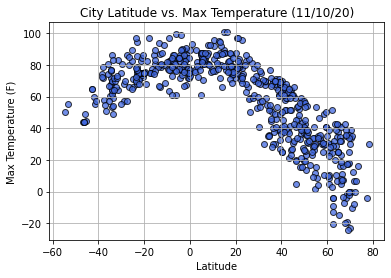

In [10]:
#Scatter plot for relationship of city latitude vs. max temperature
plt.scatter(new_df["Lat"], new_df["Max Temp"], edgecolor="black", facecolor="royalblue", linewidths=1, marker="o", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Send png image to output_data
plt.savefig("output_data/Latitude_VS_Max_Temperature.png")

#Display the graph
plt.show()

## Latitude vs. Humidity Plot

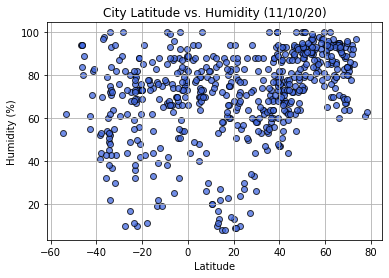

In [11]:
#Scatter plot for relationship of city latitude vs. humidity %
plt.scatter(new_df["Lat"], new_df["Humidity"],edgecolor="black", facecolor="royalblue", linewidths=1, marker="o", alpha=0.75)
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Send png image to output_data
plt.savefig("output_data/Latitude_VS_Humidity.png")

#Display the graph
plt.show()

## Latitude vs. Cloudiness Plot

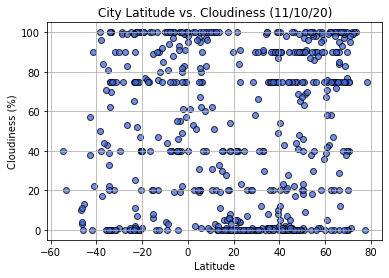

In [12]:
#Scatter plot for relationship of city latitude vs. cloudiness
plt.scatter(new_df["Lat"], new_df["Cloudiness"], edgecolor="black", facecolor="royalblue", linewidths=1, marker="o", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Send png image to output_data
plt.savefig("output_data/Latitude_VS_Cloudiness.png")

#Display the graph
plt.show()

## Latitude vs. Wind Speed Plot

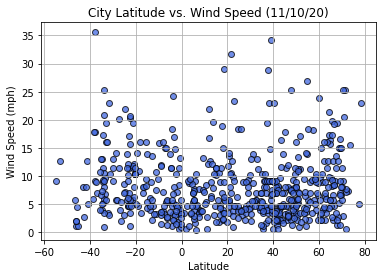

In [13]:
#Scatter plot for relationship of city latitude vs. wind speed (mph)
plt.scatter(new_df["Lat"], new_df["Wind Speed"],edgecolor="black", facecolor="royalblue", linewidths=1, marker="o", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Send png image to output_data
plt.savefig("output_data/Latitude_VS_Windspeed.png")

#Display the graph
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.7385726971823322


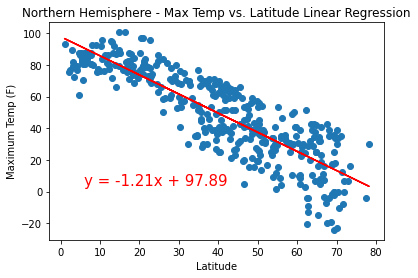

In [14]:
#Linear regression for Northern hemi: Max Temperature vs latitude
(sl, intc, rv, pv, strd) = linregress(main_data.loc[(main_data["Lat"] >= 0)]["Lat"], main_data.loc[(main_data["Lat"] >= 0)]["Max Temp"])
plt.scatter(main_data.loc[(main_data["Lat"] >= 0)]["Lat"],main_data.loc[(main_data["Lat"] >= 0)]["Max Temp"])
plt.plot(main_data.loc[(main_data["Lat"] >= 0)]["Lat"],main_data.loc[(main_data["Lat"] >= 0)]["Lat"] * sl + intc,"r-")
plt.annotate("y = " + str(round(sl,2)) + "x + " + str(round(intc,2)),(6,4),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temp (F)')
rsquared = rv**2
print(f"The r-squared value is: {rsquared}")
#Send png image to output_data
plt.savefig("output_data/Northern_Max_Temp_Vs_Latitude_Lingress.png")
plt.show()

There is a strong negative correlation when comparing latitude and maximum temperature in the northern hemisphere.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.3861422309913092


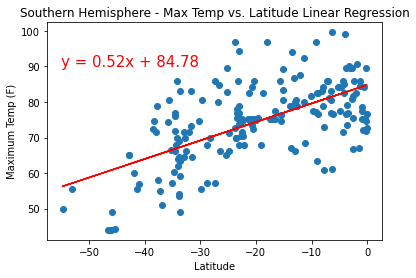

In [15]:
#Linear regression for Southern hemi: Max Temperature vs latitude
(sl, intc, rv, pv, strd) = linregress(main_data.loc[(main_data["Lat"] < 0)]["Lat"], main_data.loc[(main_data["Lat"] < 0)]["Max Temp"])
plt.scatter(main_data.loc[(main_data["Lat"] < 0)]["Lat"],main_data.loc[(main_data["Lat"] < 0)]["Max Temp"])
plt.plot(main_data.loc[(main_data["Lat"] < 0)]["Lat"],main_data.loc[(main_data["Lat"] < 0)]["Lat"] * sl + intc,"r-")
plt.annotate("y = " + str(round(sl,2)) + "x + " + str(round(intc,2)),(-55, 90),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temp (F)')
rsquared = rv**2
print(f"The r-squared value is: {rsquared}")
#Send png image to output_data
plt.savefig("output_data/Southern_Max_Temp_Vs_Latitude_Lingress.png")
plt.show()

There is a moderate positive correlation when comparing latitude and maximum temperature in the southern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.2057013148513613


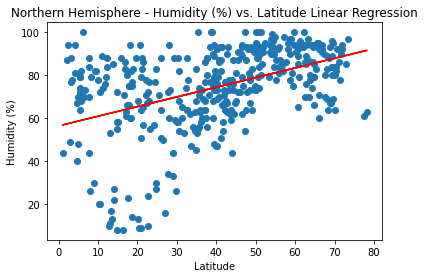

In [16]:
#Linear regression for Northern hemi: Humidity vs latitude
(sl, intc, rv, pv, strd) = linregress(main_data.loc[(main_data["Lat"] >= 0)]["Lat"], main_data.loc[(main_data["Lat"] >= 0)]["Humidity"])
plt.scatter(main_data.loc[(main_data["Lat"] >= 0)]["Lat"],main_data.loc[(main_data["Lat"] >= 0)]["Humidity"])
plt.plot(main_data.loc[(main_data["Lat"] >= 0)]["Lat"],main_data.loc[(main_data["Lat"] >= 0)]["Lat"] * sl + intc,"r-")
plt.annotate("y = " + str(round(sl,2)) + "x + " + str(round(intc,2)),(4,3),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
rsquared = rv**2
print(f"The r-squared value is: {rsquared}")
#Send png image to output_data
plt.savefig("output_data/Northern_Humidity_Vs_Latitude_Lingress.png")
plt.show()

There is a weak positive correlation when comparing latitude and humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.014869701673630246


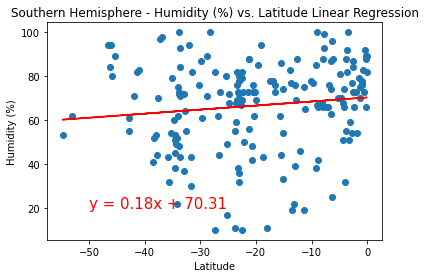

In [17]:
#Linear regression for Southern hemi: Humidity vs latitude
(sl, intc, rv, pv, strd) = linregress(main_data.loc[(main_data["Lat"] < 0)]["Lat"], main_data.loc[(main_data["Lat"] < 0)]["Humidity"])
plt.scatter(main_data.loc[(main_data["Lat"] < 0)]["Lat"],main_data.loc[(main_data["Lat"] < 0)]["Humidity"])
plt.plot(main_data.loc[(main_data["Lat"] < 0)]["Lat"],main_data.loc[(main_data["Lat"] < 0)]["Lat"] * sl + intc,"r-")
plt.annotate("y = " + str(round(sl,2)) + "x + " + str(round(intc,2)),(-50, 20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
rsquared = rv**2
print(f"The r-squared value is: {rsquared}")
#Send png image to output_data
plt.savefig("output_data/Southern_Humidity_Vs_Latitude_Lingress.png")
plt.show()

There is a weak positive correlation when comparing latitude and humidity in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.0611029421268635


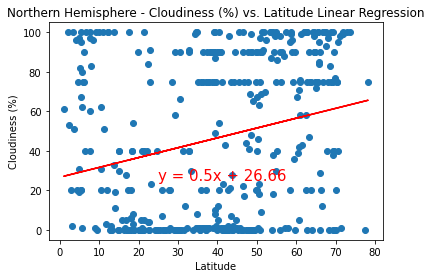

In [18]:
#Linear regression for Northern hemi: Cloudiness vs latitude
(sl, intc, rv, pv, strd) = linregress(main_data.loc[(main_data["Lat"] >= 0)]["Lat"], main_data.loc[(main_data["Lat"] >= 0)]["Cloudiness"])
plt.scatter(main_data.loc[(main_data["Lat"] >= 0)]["Lat"],main_data.loc[(main_data["Lat"] >= 0)]["Cloudiness"])
plt.plot(main_data.loc[(main_data["Lat"] >= 0)]["Lat"],main_data.loc[(main_data["Lat"] >= 0)]["Lat"] * sl + intc,"r-")
plt.annotate("y = " + str(round(sl,2)) + "x + " + str(round(intc,2)),(25,25),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
rsquared = rv**2
print(f"The r-squared value is: {rsquared}")
#Send png image to output_data
plt.savefig("output_data/Northern_Cloudiness_Vs_Latitude_Lingress.png")
plt.show()

There is a weak positive correlation when comparing latitude and cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.10598585153273235


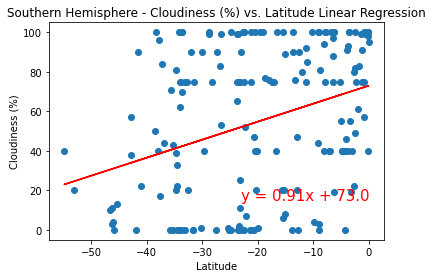

In [19]:
#Linear regression for Southern hemi: Cloudiness vs latitude
(sl, intc, rv, pv, strd) = linregress(main_data.loc[(main_data["Lat"] < 0)]["Lat"], main_data.loc[(main_data["Lat"] < 0)]["Cloudiness"])
plt.scatter(main_data.loc[(main_data["Lat"] < 0)]["Lat"],main_data.loc[(main_data["Lat"] < 0)]["Cloudiness"])
plt.plot(main_data.loc[(main_data["Lat"] < 0)]["Lat"],main_data.loc[(main_data["Lat"] < 0)]["Lat"] * sl + intc,"r-")
plt.annotate("y = " + str(round(sl,2)) + "x + " + str(round(intc,2)),(-23,15),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
rsquared = rv**2
print(f"The r-squared value is: {rsquared}")
#Send png image to output_data
plt.savefig("output_data/Southern_Cloudiness_Vs_Latitude_Lingress.png")
plt.show()

There is a weak positive correlation when comparing latitude and cloudiness in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.020679961357616378


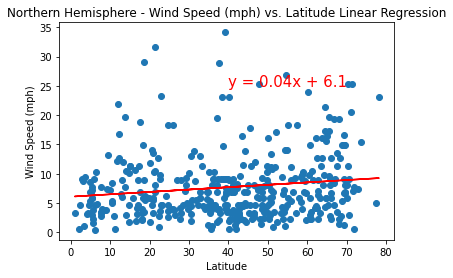

In [20]:
#Linear regression for Northern hemi: Wind Speed vs latitude
(sl, intc, rv, pv, strd) = linregress(main_data.loc[(main_data["Lat"] >= 0)]["Lat"], main_data.loc[(main_data["Lat"] >= 0)]["Wind Speed"])
plt.scatter(main_data.loc[(main_data["Lat"] >= 0)]["Lat"],main_data.loc[(main_data["Lat"] >= 0)]["Wind Speed"])
plt.plot(main_data.loc[(main_data["Lat"] >= 0)]["Lat"],main_data.loc[(main_data["Lat"] >= 0)]["Lat"] * sl + intc,"r-")
plt.annotate("y = " + str(round(sl,2)) + "x + " + str(round(intc,2)),(40,25),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
rsquared = rv**2
print(f"The r-squared value is: {rsquared}")
#Send png image to output_data
plt.savefig("output_data/Northern_Wind_Speed_Vs_Latitude_Lingress.png")
plt.show()

There is a weak positive correlation when comparing latitude and wind speed in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.03470017511137119


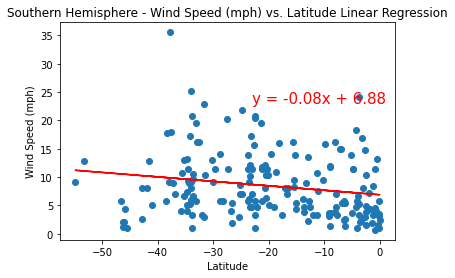

In [21]:
#Linear regression for Southern hemi: Wind Speed vs latitude
(sl, intc, rv, pv, strd) = linregress(main_data.loc[(main_data["Lat"] < 0)]["Lat"], main_data.loc[(main_data["Lat"] < 0)]["Wind Speed"])
plt.scatter(main_data.loc[(main_data["Lat"] < 0)]["Lat"],main_data.loc[(main_data["Lat"] < 0)]["Wind Speed"])
plt.plot(main_data.loc[(main_data["Lat"] < 0)]["Lat"],main_data.loc[(main_data["Lat"] < 0)]["Lat"] * sl + intc,"r-")
plt.annotate("y = " + str(round(sl,2)) + "x + " + str(round(intc,2)),(-23, 23),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
rsquared = rv**2
print(f"The r-squared value is: {rsquared}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
#Send png image to output_data
plt.savefig("output_data/Southern_Wind_Speed_Vs_Latitude_Lingress.png")
plt.show()

There is a weak negative correlation when comparing latitude and wind speed in the southern hemisphere.